In [1]:
import numpy as np
# import scipy.optimize as opt
# import sys, os, random, gzip
import os
import tensorflow as tf
# from keras import backend as K
# from keras.models import *
# from keras.layers import *
# from keras.optimizers import Adam
# from keras.losses import categorical_crossentropy
import keras
from keras import metrics
# from keras.utils import np_utils
# import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only use the first GPU
    try:
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
        tf.config.experimental.set_virtual_device_configuration(
        gpus[0],
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=12000)])
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
    except RuntimeError as e:
    # Visible devices must be set before GPUs have been initialized
        print(e)

# Data 

In [67]:
import tensorflow_datasets as tfds

# Construct a tf.data.Dataset
ds = tfds.load('mnist', split='train', shuffle_files=True)

# Build your input pipeline
# ds = ds.shuffle(1024).batch(32).prefetch(tf.data.experimental.AUTOTUNE)
ds = ds.shuffle(1024).batch(32).prefetch(tf.data.experimental.AUTOTUNE)

# x = []
# y = []
# for i in range(10):
for example in ds.take(i):
    image, label = example["image"], example["label"]
#         x.append(image)
#         y.append(label)
    

In [43]:
for example in ds.take(3):
    image, label = example["image"], example["label"]

In [68]:
x_train = image
y_train = label

In [3]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [167]:
import pandas as pd

In [168]:
data = pd.read_csv("./kc_house_data.csv")

In [169]:
data["id"].array

<PandasArray>
[7129300520, 6414100192, 5631500400, 2487200875, 1954400510, 7237550310,
 1321400060, 2008000270, 2414600126, 3793500160,
 ...
 7852140040, 9834201367, 3448900210, 7936000429, 2997800021,  263000018,
 6600060120, 1523300141,  291310100, 1523300157]
Length: 21613, dtype: int64

In [170]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [173]:
x_rg = data.values

In [18]:
data.head(1).index

RangeIndex(start=0, stop=1, step=1)

In [8]:
dir(data)

['T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_e

In [175]:
x_rg.shape

(21613, 21)

In [184]:
y_rg = x_rg[:,2]
x_rg = x_rg[:,3:]

In [186]:
x_rg.shape, y_rg.shape

((21613, 18), (21613,))

## Custom Loss Function

In [4]:
class MeanSquaredError(tf.keras.losses.Loss):
    
    def call(self, y_true, y_pred):
        y_pred = tf.convert_to_tensor_v2(y_pred)
        y_true = tf.cast(y_true, y_pred.dtype)
        return tf.reduce_mean(math_ops.square(y_pred - y_true), axis=-1)

## Custom Layer

In [ ]:
class KQV(tf.keras.layers.Layer):
    def __init__(self, units=128):
        super(KQV, self).__init__()
        self.units = units
        
    def build(self, input_shape):  # Create the state of the layer (weights)
        wq_init = tf.random_normal_initializer()
        wk_init = tf.random_normal_initializer()
        wv_init = tf.random_normal_initializer()
        
        self.wq = tf.Variable(initial_value=wq_init(shape=(self.units, input_shape[-2] ), dtype='float32'), trainable=True)
        self.wk = tf.Variable(initial_value=wk_init(shape=(self.units, input_shape[-2] ), dtype='float32'), trainable=True)
        self.wv = tf.Variable(initial_value=wv_init(shape=(self.units, input_shape[-2] ), dtype='float32'), trainable=True)

        
#         b_init = tf.zeros_initializer()
#         self.b = tf.Variable(initial_value=b_init(shape=(self.units,), dtype='float32'), trainable=True)
        
    def call(self, inputs):  # Defines the computation from inputs to outputs
        q = tf.matmul(self.wq,inputs)
        k = tf.matmul(self.wk,inputs)
        v = tf.matmul(self.wv, inputs)

        return k, q, v


In [3]:
class MultiHeadAttention(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()
        self.num_heads = num_heads
        self.d_model = d_model
        
        assert d_model % self.num_heads == 0
        
        self.depth = d_model // self.num_heads
        self.wq = tf.keras.layers.Dense(d_model)
        self.wk = tf.keras.layers.Dense(d_model)
        self.wv = tf.keras.layers.Dense(d_model)
        
        self.dense = tf.keras.layers.Dense(d_model)
        
    def split_heads(self, x, batch_size):
        """Split the last dimension into (num_heads, depth).
        Transpose the result such that the shape is (batch_size, num_heads, seq_len, depth)
        """
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
        return tf.transpose(x, perm=[0, 2, 1, 3])
    def call(self, v, k, q, mask):
        batch_size = tf.shape(q)[0]
        
        q = self.wq(q)  # (batch_size, seq_len, d_model)
        k = self.wk(k)  # (batch_size, seq_len, d_model)
        v = self.wv(v)  # (batch_size, seq_len, d_model)
        
        q = self.split_heads(q, batch_size)  # (batch_size, num_heads, seq_len_q, depth)
        k = self.split_heads(k, batch_size)  # (batch_size, num_heads, seq_len_k, depth)
        v = self.split_heads(v, batch_size)  # (batch_size, num_heads, seq_len_v, depth)
        
        # scaled_attention.shape == (batch_size, num_heads, seq_len_q, depth)
        # attention_weights.shape == (batch_size, num_heads, seq_len_q, seq_len_k)
        scaled_attention, attention_weights = scaled_dot_product_attention(
            q, k, v, mask)
        
        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])  # (batch_size, seq_len_q, num_heads, depth)
        
        concat_attention = tf.reshape(scaled_attention, 
                                      (batch_size, -1, self.d_model))  # (batch_size, seq_len_q, d_model)
        
        output = self.dense(concat_attention)  # (batch_size, seq_len_q, d_model)
        
        return output, attention_weights
def point_wise_feed_forward_network(d_model, dff):
    return tf.keras.Sequential([
        tf.keras.layers.Dense(dff, activation='relu'),  # (batch_size, seq_len, dff)
        tf.keras.layers.Dense(d_model)  # (batch_size, seq_len, d_model)
    ])

class EncoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, dff, rate=0.1):
        super(EncoderLayer, self).__init__()
        
        self.mha = MultiHeadAttention(d_model, num_heads)
        self.ffn = point_wise_feed_forward_network(d_model, dff)
        
        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        
        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)
        
    def call(self, x, training, mask):
        
        attn_output, _ = self.mha(x, x, x, mask)  # (batch_size, input_seq_len, d_model)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(x + attn_output)  # (batch_size, input_seq_len, d_model)
        
        ffn_output = self.ffn(out1)  # (batch_size, input_seq_len, d_model)
        ffn_output = self.dropout2(ffn_output, training=training)
        out2 = self.layernorm2(out1 + ffn_output)  # (batch_size, input_seq_len, d_model)
        
        return out2

In [433]:
class Symmetry_Set_Basis(tf.keras.layers.Layer):
    def __init__(self, node=7, num_out=1, rank=2):
        super(Symmetry_Set_Basis, self).__init__()
        self.node = node
        self.wq = tf.keras.layers.Dense(node)
        self.wq2 = tf.keras.layers.Dense(node)
        self.wk = tf.keras.layers.Dense(node)
        self.num_out = num_out
        self.p = [[0,2,1],[0,1,3,2], [0,1,2,4,3], [0,1,2,3,5,4]][rank-2]
        self.rui = tf.random_uniform_initializer(minval=-10, maxval=10)
    
    def Tile_reshape(self, cn):
        a = cn.shape
#         a = tf.constant(a)
        b = tf.zeros(tf.rank(cn))+1
        b = tf.cast(b,tf.int32)
        a = tf.concat([b[:-1],b[-1:]*tf.constant(a[-1], tf.int32)], -1)
        return a
    def VP(self, m, cn): # m: order,  cn: input tensor, k: range
#         cn = tf.cast(cn, tf.float64)
        vp = tf.math.pow(cn,m)
        vp = tf.reduce_sum(vp, axis = -1)
        vp = tf.expand_dims(vp, axis = -1)
        vp = tf.tile(vp, self.Tile_reshape(cn))
        return vp
    
    def VC1(self, cn):
        
        vc = tf.reduce_sum(cn, axis = -1)
        vc = tf.expand_dims(vc, axis=-1)
        vc = tf.tile(vc, self.Tile_reshape(cn))
#         vc = tf.cast(vc, tf.float64)
        return vc
    def VC2(self, cn):
        vc = (self.VC1(cn)**2 - self.VP(2, cn))/2
        return vc
    def VC3(self, cn):
        vc1 = self.VC1(cn)
        vp2 = self.VP(2,cn)
        vp3 = self.VP(3,cn)
        vc = (vc1**3-vp3-3*(vp2 * vc1-vp3 ))/6
        return vc
    def VC4(self, cn):
        vc = (self.VC3(cn)*self.VP(1,cn) - self.VC2(cn)*self.VP(2,cn) + self.VC1(cn)*self.VP(3,cn) - self.VP(4,cn) )/4
        return vc
    
    def call(self, q, k, v):
#         out_num = self.order*2
#         v = tf.expand_dims(v, axis = -1)
#         v = tf.tile(v, self.Tile_reshape(out_num))
        vc1 = self.VC1(v)
        vc2 = self.VC2(v)
        vc3 = self.VC3(v)
        vc4 = self.VC4(v)
        vp2 = self.VP(2,v)
        vp3 = self.VP(3,v)
        vp4 = self.VP(4,v)
        print("v shape:", v.shape)
        print("vc shape:", vc1.shape)
##--------------------------------------------------------
        vc2 = tf.math.pow(tf.math.abs(vc2),1/2)*tf.math.sign(vc2)
        vc3 = tf.math.pow(tf.math.abs(vc3),1/3)*tf.math.sign(vc3)
        vc4 = tf.math.pow(tf.math.abs(vc4),1/4)*tf.math.sign(vc4)
        vp2 = tf.math.pow(tf.math.abs(vp2),1/2)*tf.math.sign(vp2)
        vp3 = tf.math.pow(tf.math.abs(vp3),1/3)*tf.math.sign(vp3)
        vp4 = tf.math.pow(tf.math.abs(vp4),1/4)*tf.math.sign(vp4)


##----------------------------------------------------------


        vc1 = tf.expand_dims(vc1, axis=-1)
        vc2 = tf.expand_dims(vc2, axis=-1)
        vc3 = tf.expand_dims(vc3, axis=-1)
        vc4 = tf.expand_dims(vc4, axis=-1)
        vp2 = tf.expand_dims(vp2, axis=-1)
        vp3 = tf.expand_dims(vp3, axis=-1)
        vp4 = tf.expand_dims(vp4, axis=-1)

        v = tf.concat([vc1, vc2, vc3, vc4, vp2, vp3, vp4], axis =-1)
        print("v shape:", v.shape)
#         v = tf.Variable(self.rui(shape = tf.shape(v)), dtype=tf.float32)*v
        

        q = tf.expand_dims(q, axis=-1)
#         print("q shape:", q.shape)

        q = self.wq(q)
#         print("q shape:", q.shape)
        q = tf.transpose(q, perm=self.p) 
#         print("q shape:", q.shape)

        k = self.wk(v)
#         print("k shape:", k.shape)
#         print("wk",k)
        k = tf.transpose(k, perm=self.p) 
#         print("k shape:", k.shape)
#         n = tf.matmul(q,k) ##tooooooooooo slow
#         print("k",k)
#         print("q",q)
##--------------------------------------------------------------------normalize----------
#         k = tf.math.log(tf.math.abs(k+1e-10)+1)
#         q = tf.math.log(tf.math.abs(q+1e-10)+1)

#         print("kdiv",tf.reduce_sum(tf.math.pow(k,2) ,axis=-1))

        k = k/tf.expand_dims(tf.math.sqrt(tf.reduce_sum(tf.math.pow(k,2) ,axis=-1))+1e-10, axis=-1)
        q = q/tf.expand_dims(tf.math.sqrt(tf.reduce_sum(tf.math.pow(q,2) ,axis=-1))+1e-10, axis=-1)
#         print("k",k)
#         print("q",q)
##-----------------------------------------------------------------------------------------
        n = tf.math.multiply_no_nan(k,q)
#         n = k*q
#         print("n shape:", n.shape)

#         print("v shape:", v.shape)
##--------------------------------------------------sum all v*n version ------------------------------------------
        n = tf.transpose(n, perm=self.p)
        print("v shape:", v.shape)
        print("n shape:", n.shape)
        v = tf.math.multiply_no_nan(n,v)
#         v = v*n

#         n = tf.reduce_sum(n, axis=-1)
#         v = tf.reduce_max(v, axis=-2)
#         v = tf.reduce_sum(v, axis=-2)
        v = tf.reduce_sum(v, axis=-1)

##-----------------------------------------------top k version------------------------------
#         pn = tf.math.top_k(n, k = self.num_out)
#         n = pn.values
#         index = pn.indices
#         v = tf.gather(v,index, batch_dims=-1)
##------------------------------------------------------------------------------------------------




#         print("v shape:", v.shape)
        return v
        


        
        


In [366]:
class Operator_Basis(tf.keras.layers.Layer):
    def __init__(self, node=3, num_out=1, rank=2):
        super(Operator_Basis, self).__init__()
        self.node = node
        self.wq = tf.keras.layers.Dense(node)
        self.wq2 = tf.keras.layers.Dense(node)
        self.wk = tf.keras.layers.Dense(node)
        self.alpha = tf.keras.layers.Dense(1)
        self.num_out = num_out
        self.p = [[0,2,1],[0,1,3,2], [0,1,2,4,3], [0,1,2,3,5,4]][rank-2]
    
    def call(self, q, k, v):
        sqrt = tf.math.sqrt(tf.math.abs(v)+1e-10)
        ln = tf.math.log(tf.math.abs(v)+1)
#         exp = tf.math.exp(v)
        rgsn = self.alpha(tf.expand_dims(v, axis=-1))
        
        sqrt= tf.expand_dims(sqrt, axis=-1)
        ln = tf.expand_dims(ln, axis=-1)
#         exp = tf.expand_dims(exp, axis=-1)

#         v = tf.concat([sqrt, ln, exp, rgsn], axis =-1)
        v = tf.concat([sqrt, ln, rgsn], axis =-1)

        q = tf.expand_dims(q, axis=-1)
        q = self.wq(q)
        q = tf.transpose(q, perm=self.p) 
        k = self.wk(v)
        k = tf.transpose(k, perm=self.p) 
        
        k = k/tf.expand_dims(tf.math.sqrt(tf.reduce_sum(tf.math.pow(k,2)+1e-10 ,axis=-1)), axis=-1)
        q = q/tf.expand_dims(tf.math.sqrt(tf.reduce_sum(tf.math.pow(q,2)+1e-10 ,axis=-1)), axis=-1)
    

#         n = k*q
        n = tf.math.multiply_no_nan(k,q)

#         n = tf.reduce_sum(n, axis=-1)
#         print("n shape:", n.shape)
#         print("v shape:", v.shape)
        n = tf.transpose(n, perm=self.p) 
#         print("n shape:", n.shape)


#         v = tf.reduce_max(v, axis=-2)
#         print("v shape:", v.shape)

##--------------------------------------------------sum all v*n version ------------------------------------------
        v = tf.math.multiply_no_nan(n,v)
#         v = v*n
#         v = tf.reduce_sum(v, axis=-2)
        v = tf.reduce_sum(v, axis=-1)

##----------------------------------------------------------------------------------------------
#         v = tf.reduce_sum(v, axis=-2)
#         pn = tf.math.top_k(n, k = self.num_out)
#         n = pn.values
#         index = pn.indices
#         v = tf.gather(v,index, batch_dims=-1)
        return v
        


        
        


In [260]:
class Data_Selection(tf.keras.layers.Layer):
    def __init__(self, node=1000, num_out=100, rank=2):
        super(Data_Selection, self).__init__()
        self.node = node
        self.wq = tf.keras.layers.Dense(node)
        self.wq2 = tf.keras.layers.Dense(node)
        self.wk = tf.keras.layers.Dense(node)
        self.num_out = num_out
        self.p = [[0,2,1],[0,1,3,2], [0,1,2,4,3], [0,1,2,3,5,4]][rank-2]
    def call(self, q, k, v):
        q = tf.expand_dims(q, axis=-1)
        q = self.wq(q)
        q = tf.transpose(q, perm=self.p) 
#         print("q shape:", q.shape)
        k = tf.expand_dims(k, axis=-1)
        k = self.wk(k)
        k = tf.transpose(k, perm=self.p) 
        k = k/tf.expand_dims(tf.math.sqrt(tf.reduce_sum(tf.math.pow(k,2)+1e-10 ,axis=-1)), axis=-1)
        q = q/tf.expand_dims(tf.math.sqrt(tf.reduce_sum(tf.math.pow(q,2)+1e-10 ,axis=-1)), axis=-1)
        n = k*q
##------------------------------------------------------------
        n = tf.transpose(n, perm=self.p)
        print("n shape:", n.shape)
        v = tf.expand_dims(v, axis=-1)
        v = n*v
        v = tf.reduce_sum(v, axis=-2)
        print("v shape:", v.shape)

##-----------------------------------------------------
#         n = tf.reduce_sum(n, axis=-1)
#         pn = tf.math.top_k(n, k = self.num_out)
#         n = pn.values
#         index = pn.indices
#         v = tf.gather(v,index, batch_dims=-1)
        return v

In [170]:
tf.zeros(tf.rank(x))+1

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1., 1.], dtype=float32)>

In [149]:
tf.zeros()+1

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1., 1.], dtype=float32)>

In [4]:
x_train.shape

(60000, 28, 28)

In [20]:
np.sum(x_train, axis = -1).shape

(60000, 28)

In [262]:
d = np.sum(np.sum(x_train, axis = -1), axis=-1)
d=np.expand_dims(d, axis=-1)
d=np.expand_dims(d, axis=-1)

x_train = x_train/d

In [ ]:
# x_(t+1) = x_t - lr*grad.(f(x_t))

opt = tf.keras.optimizers.Adam(learning_rate=0.1)
var1 = tf.Variable(10.0)
loss = lambda: (var1 ** 2)/2.0       # d(loss)/d(var1) == var1
step_count = opt.minimize(loss, [var1]).numpy()
# The first step is `-learning_rate*sign(grad)`
var1.numpy()

In [346]:
x = x_rg[15:16]
Symmetry_Set_Basis(num_out=1, rank=tf.rank(x))(x,x,x), x

v shape: (1, 18)
vc shape: (1, 18)
v shape: (1, 18, 7)
wk tf.Tensor(
[[[ 2.6270730e+19 -8.2268506e+18  2.3547427e+19  3.4691540e+19
   -2.6427677e+19  2.5053866e+19 -3.0322136e+19]
  [ 2.6270730e+19 -8.2268506e+18  2.3547427e+19  3.4691540e+19
   -2.6427677e+19  2.5053866e+19 -3.0322136e+19]
  [ 2.6270730e+19 -8.2268506e+18  2.3547427e+19  3.4691540e+19
   -2.6427677e+19  2.5053866e+19 -3.0322136e+19]
  [ 2.6270730e+19 -8.2268506e+18  2.3547427e+19  3.4691540e+19
   -2.6427677e+19  2.5053866e+19 -3.0322136e+19]
  [ 2.6270730e+19 -8.2268506e+18  2.3547427e+19  3.4691540e+19
   -2.6427677e+19  2.5053866e+19 -3.0322136e+19]
  [ 2.6270730e+19 -8.2268506e+18  2.3547427e+19  3.4691540e+19
   -2.6427677e+19  2.5053866e+19 -3.0322136e+19]
  [ 2.6270730e+19 -8.2268506e+18  2.3547427e+19  3.4691540e+19
   -2.6427677e+19  2.5053866e+19 -3.0322136e+19]
  [ 2.6270730e+19 -8.2268506e+18  2.3547427e+19  3.4691540e+19
   -2.6427677e+19  2.5053866e+19 -3.0322136e+19]
  [ 2.6270730e+19 -8.2268506e+18  2

(<tf.Tensor: shape=(1, 18), dtype=float32, numpy=
 array([[9.7922925e+17, 8.0966167e+17, 7.1021882e+18, 7.6290285e+18,
         6.0524301e+17, 0.0000000e+00, 8.0966167e+17, 8.0966167e+17,
         1.5553235e+18, 6.7042557e+18, 5.9927380e+18, 6.7037515e+18,
         0.0000000e+00, 1.0603152e+19, 3.0297832e+18, 3.9428487e+18,
         6.7817976e+18, 7.4061943e+18]], dtype=float32)>,
 array([[ 4.00000e+00,  3.00000e+00,  2.95000e+03,  5.00000e+03,
          2.00000e+00,  0.00000e+00,  3.00000e+00,  3.00000e+00,
          9.00000e+00,  1.98000e+03,  9.70000e+02,  1.97900e+03,
          0.00000e+00,  9.81260e+04,  4.75714e+01, -1.22375e+02,
          2.14000e+03,  4.00000e+03]], dtype=float32))

In [427]:
## tf.keras.backend.set_floatx('float32')
inputs = tf.keras.Input(shape=(18))
x = inputs
print(x.shape)
# x = tf.keras.layers.BatchNormalization()(x)
# print(x.shape)


x = Symmetry_Set_Basis(num_out=1, rank=tf.rank(x))(x, x, x)
print(x.shape)

x = Operator_Basis(num_out=1,rank=tf.rank(x))(x, x, x)
print(x.shape)
x = Symmetry_Set_Basis(num_out=1, rank=tf.rank(x))(x, x, x)
print(x.shape)
x = Operator_Basis(num_out=1,rank=tf.rank(x))(x, x, x)
print(x.shape)

# x = Operator_Basis(num_out=1,rank=tf.rank(x))(x, x, x)
# print(x.shape)
# x = Symmetry_Set_Basis(num_out=1, rank=tf.rank(x))(x, x, x)
# print(x.shape)

# x = Operator_Basis(num_out=1,rank=tf.rank(x))(x, x, x)
# print(x.shape)
# x = tf.keras.layers.Dense(32)(x)
x = tf.keras.layers.Dense(1)(x)
modelANN = tf.keras.Model(inputs= inputs, outputs=x, name='ANN')

(None, 18)
v shape: (None, 18)
vc shape: (None, 18)
v shape: (None, 18, 7)
v shape: (None, 18, 7)
n shape: (None, 18, 7)
(None, 18)
(None, 18)
v shape: (None, 18)
vc shape: (None, 18)
v shape: (None, 18, 7)
v shape: (None, 18, 7)
n shape: (None, 18, 7)
(None, 18)
(None, 18)


In [ ]:
## tf.math.is_nan()

In [286]:
np.any(np.isnan(x_rg))

False

In [428]:
model_type = "ANN"
save_dir = './test1/'
model_name = '%s_model_'% model_type 
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
filepath = os.path.join(save_dir, model_name)

# Prepare callbacks for model saving and for learning rate adjustment.
checkpoint = keras.callbacks.ModelCheckpoint(filepath=filepath, verbose=1, save_best_only=True)
csv_logger = keras.callbacks.CSVLogger(save_dir+model_type+'.csv')


earlystop = keras.callbacks.EarlyStopping(
                            monitor="val_loss",
                            min_delta=1e-4,
                            patience=3, # 10
                            verbose=1,
                            mode='min', baseline=None, ## 'min' 
                            restore_best_weights=True)
# reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
#                               patience=2, min_lr=0.00001)
callbacks = [checkpoint, csv_logger,  earlystop ]

In [429]:
loss_fn = tf.keras.losses.MeanSquaredError()
# modelANN.compile(optimizer='adam' , loss=loss_fn, metrics=['accuracy', metrics.AUC(name="auc")])
modelANN.compile(optimizer='adam',
                 loss=loss_fn,
                 metrics=['accuracy'])
modelANN.summary()

Model: "ANN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_83 (InputLayer)        [(None, 18)]              0         
_________________________________________________________________
symmetry__set__basis_116 (Sy (None, 18)                70        
_________________________________________________________________
operator__basis_48 (Operator (None, 18)                20        
_________________________________________________________________
symmetry__set__basis_117 (Sy (None, 18)                70        
_________________________________________________________________
operator__basis_49 (Operator (None, 18)                20        
_________________________________________________________________
dense_673 (Dense)            (None, 1)                 19        
Total params: 199
Trainable params: 199
Non-trainable params: 0
_________________________________________________________________

In [337]:
x_rg = np.array(x_rg)
y_rg = np.array(y_rg)

In [338]:
x_rg = x_rg.astype(np.float32)
y_rg = y_rg.astype(np.float32)

In [447]:

modelANN.fit(np.log(np.abs(x_rg)+1), np.log(np.abs(y_rg)+1), callbacks = callbacks, shuffle=True , epochs=20, batch_size=32, verbose=1)
# modelANN.fit(np.log(np.abs(x_rg)+1), np.log(np.abs(y_rg)+1), epochs=10)

Epoch 1/20
676/676 [==============================] - 5s 8ms/step - loss: 4.1865e-04 - accuracy: 4.1642e-04
Epoch 2/20
676/676 [==============================] - 5s 8ms/step - loss: 4.1344e-04 - accuracy: 4.1642e-04
Epoch 3/20
676/676 [==============================] - 6s 8ms/step - loss: 4.0741e-04 - accuracy: 4.6268e-04
Epoch 4/20
676/676 [==============================] - 5s 8ms/step - loss: 3.9795e-04 - accuracy: 4.6268e-04
Epoch 5/20
676/676 [==============================] - 6s 8ms/step - loss: 4.0073e-04 - accuracy: 4.6268e-04
Epoch 6/20
676/676 [==============================] - 5s 8ms/step - loss: 3.7856e-04 - accuracy: 4.6268e-04
Epoch 7/20
676/676 [==============================] - 6s 8ms/step - loss: 3.7168e-04 - accuracy: 4.6268e-04
Epoch 8/20
676/676 [==============================] - 5s 8ms/step - loss: 3.7603e-04 - accuracy: 4.6268e-04
Epoch 9/20
676/676 [==============================] - 5s 8ms/step - loss: 3.4902e-04 - accuracy: 4.6268e-04
Epoch 10/20
676/676 [=======

In [448]:
y_pre = modelANN.predict(np.log(np.abs(x_rg)+1))

In [386]:
import matplotlib.pyplot as plt


In [425]:
y_pre

array([[0.5294644 ],
       [0.46715382],
       [0.5347007 ],
       ...,
       [0.5334146 ],
       [0.5299744 ],
       [0.5346126 ]], dtype=float32)

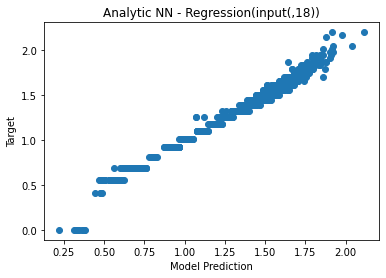

In [454]:
plt.title("Analytic NN - Regression(input(,18))")
# plt.hist(y_pre, histtype='step')
# plt.hist(np.log(np.abs(y_rg)+1), histtype='step' )
plt.xlabel("Model Prediction")
plt.ylabel("Target")
plt.scatter(y_pre,np.log(np.abs(y_rg)+1))
# plt.xlim([0,2.5])
plt.savefig("./plot/Regression_Scatter.png")
plt.show()


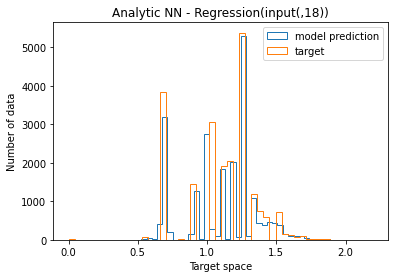

In [455]:
plt.title("Analytic NN - Regression(input(,18))")
plt.xlabel("Target space")
plt.ylabel("Number of data")
plt.hist(y_pre, histtype='step', label = "model prediction", bins = 50)
plt.hist(np.log(np.abs(y_rg)+1), histtype='step',  label = "target", bins = 50)
plt.legend()
plt.savefig("./plot/Regression_Hist.png")
# plt.xlim([0,2.5])
plt.show()

In [ ]:
modelANN.save

In [162]:
tf.keras.backend.set_floatx('float32')
inputs = tf.keras.Input(shape=(28,28))
x = inputs
# x = tf.cast(x, tf.float64)
print(x.shape)

x = tf.keras.layers.Flatten()(x)
print(x.shape)
# x = tf.keras.layers.Flatten()(x)
# print(x.shape)
x = Data_Selection(node = 100, num_out=20,rank=tf.rank(x))(x,x,x)
print(x.shape)

# a = Symmetry_Set_Basis(num_out=1, rank=tf.rank(x))(x, x, x)
# b = Symmetry_Set_Basis(num_out=1, rank=tf.rank(x))(x, x, x)
# c = Symmetry_Set_Basis(num_out=1, rank=tf.rank(x))(x, x, x)
# x = Symmetry_Set_Basis(num_out=1, rank=tf.rank(x))(x, x, x)
# x = tf.squeeze(x, axis=-1)
# a = tf.squeeze(a, axis=-1)
# b = tf.squeeze(b, axis=-1)
# c = tf.squeeze(c, axis=-1)
# print("a:",a.shape)
# print(x.shape)
# a = tf.concat([x,a], axis=-1)
# b = tf.concat([x,b], axis=-1)
# c = tf.concat([x,c], axis=-1)
# print("a:",a.shape)

# a = Operator_Basis(num_out=1,rank=tf.rank(a))(a, a, a)
# b = Operator_Basis(num_out=1,rank=tf.rank(b))(b, b, b)
# c = Operator_Basis(num_out=1,rank=tf.rank(c))(c, c, c)
# print("a:",a.shape)
# a = tf.squeeze(a, axis=-1)

# x = tf.concat([x,a], axis=-1)
# b = tf.concat([b,c], axis=-1)
# print(x.shape)
# x = Symmetry_Set_Basis(num_out=1, rank=tf.rank(x))(x, x, x)
# b = Symmetry_Set_Basis(num_out=1, rank=tf.rank(b))(b, b, b)
# x = tf.squeeze(x, axis=-1)
# b = tf.squeeze(b, axis=-1)
# print(x.shape)
# x = Operator_Basis(num_out=1,rank=tf.rank(x))(x, x, x)
# b = Operator_Basis(num_out=1,rank=tf.rank(b))(b, b, b)
# print(x.shape)
# x = tf.concat([x,b], axis=-1)
# print(x.shape)

x = Symmetry_Set_Basis(num_out=1, rank=tf.rank(x))(x, x, x)
print(x.shape)

x = Operator_Basis(num_out=1,rank=tf.rank(x))(x, x, x)
print(x.shape)

# x = Symmetry_Set_Basis(num_out=1, rank=tf.rank(x))(x, x, x)
# a = Symmetry_Set_Basis(num_out=1, rank=tf.rank(x))(x, x, x)
# b = Symmetry_Set_Basis(num_out=1, rank=tf.rank(x))(x, x, x)
# print(x.shape)


# x = Operator_Basis(num_out=1,rank=tf.rank(x))(x, x, x)
# a = Operator_Basis(num_out=1,rank=tf.rank(a))(a, a, a)
# b = Operator_Basis(num_out=1,rank=tf.rank(b))(b, b, b)
# print(x.shape)
# x = tf.concat([x,a,b], axis=-1)
# print(x.shape)








# x = tf.keras.layers.Dense(256)(x)
# print(x.shape)
# x = tf.keras.layers.Dense(128)(x)
# print(x.shape)
# x = tf.keras.layers.Dense(32)(x)
# print(x.shape)
x = tf.keras.layers.Dense(10)(x)
print(x.shape)
x = tf.keras.layers.Activation("softmax")(x)
print(x.shape)
modelANN = tf.keras.Model(inputs= inputs, outputs=x, name='ANN')

(None, 28, 28)
(None, 784)
n shape: (None, 784, 100)
v shape: (None, 100)
(None, 100)
v shape: (None, 100, 7)
n shape: (None, 100, 7)
(None, 100)
(None, 100)
(None, 10)
(None, 10)


In [163]:
model_type = "ANN"
save_dir = './test1/'
model_name = '%s_model_'% model_type 
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
filepath = os.path.join(save_dir, model_name)

# Prepare callbacks for model saving and for learning rate adjustment.
checkpoint = keras.callbacks.ModelCheckpoint(filepath=filepath, verbose=1, save_best_only=True)
csv_logger = keras.callbacks.CSVLogger(save_dir+model_type+'.csv')


earlystop = keras.callbacks.EarlyStopping(
                            monitor="val_loss",
                            min_delta=1e-4,
                            patience=3, # 10
                            verbose=1,
                            mode='min', baseline=None, ## 'min' 
                            restore_best_weights=True)
# reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
#                               patience=2, min_lr=0.00001)
callbacks = [checkpoint, csv_logger,  earlystop ]

In [164]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [165]:
# modelANN.compile(optimizer='adam' , loss=loss_fn, metrics=['accuracy', metrics.AUC(name="auc")])
modelANN.compile(optimizer='adam',
                 loss=loss_fn,
                 metrics=['accuracy'])
modelANN.summary()

Model: "ANN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_39 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
flatten_31 (Flatten)         (None, 784)               0         
_________________________________________________________________
data__selection_16 (Data_Sel (None, 100)               400       
_________________________________________________________________
symmetry__set__basis_45 (Sym (None, 100)               70        
_________________________________________________________________
operator__basis_30 (Operator (None, 100)               30        
_________________________________________________________________
dense_342 (Dense)            (None, 10)                1010      
_________________________________________________________________
activation_29 (Activation)   (None, 10)                0       

In [306]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [118]:
y_train.shape


(60000,)

In [53]:
vec = np.zeros([10])

In [54]:
vec

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [69]:
y2[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [99]:
# y = [ for i in y_train]
y2 = []
for i in y_train:
    vec = np.zeros([10])    
    vec[i]=1
    y2.append(vec)
y2=np.array(y2)    
y2.shape


(60000, 10)

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [107]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [166]:

# modelANN.fit(x_train, y2 , callbacks = callbacks, shuffle=True , epochs=400, batch_size=32, verbose=1)
modelANN.fit(x_train, y_train, epochs=4)

Epoch 1/4
n shape: (32, 784, 100)
v shape: (32, 100)
v shape: (32, 100, 7)
n shape: (32, 100, 7)
n shape: (32, 784, 100)
v shape: (32, 100)
v shape: (32, 100, 7)
n shape: (32, 100, 7)
1875/1875 [==============================] - 54s 29ms/step - loss: 2.1954 - accuracy: 0.2388
Epoch 2/4
1875/1875 [==============================] - 54s 29ms/step - loss: 2.1695 - accuracy: 0.2695
Epoch 3/4
1875/1875 [==============================] - 54s 29ms/step - loss: 2.1632 - accuracy: 0.2755
Epoch 4/4
1875/1875 [==============================] - 53s 29ms/step - loss: 2.1611 - accuracy: 0.2781


In [ ]:
# Selection Block
class Selection(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads):
        super(Selection, self).__init__()
        self.num_heads = num_heads
        self.d_model = d_model
        
        assert d_model % self.num_heads == 0
        
        self.depth = d_model // self.num_heads
        self.wq = tf.keras.layers.Dense(d_model)
        self.wk = tf.keras.layers.Dense(d_model)
        
#         self.wv = tf.keras.layers.Dense(d_model)
        
        self.dense = tf.keras.layers.Dense(d_model)
        
    def split_heads(self, x, batch_size):
        """Split the last dimension into (num_heads, depth).
        Transpose the result such that the shape is (batch_size, num_heads, seq_len, depth)
        """
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
        return tf.transpose(x, perm=[0, 2, 1, 3])
    def call(self, v, k, q, mask):
        batch_size = tf.shape(q)[0]
        
        q = self.wq(q)  # (batch_size, seq_len, d_model)
        k = self.wk(k)  # (batch_size, seq_len, d_model)
        v = self.wv(v)  # (batch_size, seq_len, d_model)
        
        q = self.split_heads(q, batch_size)  # (batch_size, num_heads, seq_len_q, depth)
        k = self.split_heads(k, batch_size)  # (batch_size, num_heads, seq_len_k, depth)
        v = self.split_heads(v, batch_size)  # (batch_size, num_heads, seq_len_v, depth)
        
        # scaled_attention.shape == (batch_size, num_heads, seq_len_q, depth)
        # attention_weights.shape == (batch_size, num_heads, seq_len_q, seq_len_k)
        scaled_attention, attention_weights = scaled_dot_product_attention(
            q, k, v, mask)
        
        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])  # (batch_size, seq_len_q, num_heads, depth)
        
        concat_attention = tf.reshape(scaled_attention, 
                                      (batch_size, -1, self.d_model))  # (batch_size, seq_len_q, d_model)
        
        output = self.dense(concat_attention)  # (batch_size, seq_len_q, d_model)
        
        return output, attention_weights


## Optimize

In [13]:
# x_(t+1) = x_t - lr*grad.(f(x_t))

opt = tf.keras.optimizers.Adam(learning_rate=0.1)
var1 = tf.Variable(10.0)
loss = lambda: (var1 ** 2)/2.0       # d(loss)/d(var1) == var1
step_count = opt.minimize(loss, [var1]).numpy()
# The first step is `-learning_rate*sign(grad)`
var1.numpy()

9.9

In [45]:
while var1.numpy()>0.1:
    opt.minimize(loss, [var1]).numpy()
    print(var1.numpy())

0.9540412
0.9305041
0.90742856
0.8848088
0.862639
0.8409134
0.8196262
0.79877156
0.7783437
0.7583367
0.73874485
0.7195623
0.70078325
0.68240196
0.66441256
0.64680934
0.6295866
0.6127385
0.59625936
0.5801435
0.5643853
0.54897904
0.5339191
0.5191999
0.50481594
0.4907616
0.47703144
0.46361995
0.4505217
0.43773136
0.4252435
0.41305286
0.40115413
0.3895421
0.3782116
0.36715743
0.35637453
0.34585783
0.33560234
0.3256031
0.3158552
0.30635378
0.29709405
0.28807122
0.2792806
0.2707176
0.26237753
0.25425592
0.24634825
0.23865008
0.23115706
0.22386485
0.21676919
0.20986587
0.20315073
0.1966197
0.19026873
0.18409383
0.1780911
0.17225665
0.16658668
0.16107745
0.15572527
0.1505265
0.14547755
0.14057492
0.13581514
0.13119482
0.12671058
0.12235916
0.11813731
0.11404186
0.11006968
0.10621771
0.102482945
0.09886242


In [53]:
a = tf.constant([[1,1],[2,2],[3,3]])
a.numpy()

array([[1, 1],
       [2, 2],
       [3, 3]], dtype=int32)

In [55]:
tf.math.pow(a,2)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[1, 1],
       [4, 4],
       [9, 9]], dtype=int32)>

In [57]:
tf.reduce_sum(a, axis=-1)

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([2, 4, 6], dtype=int32)>

# 

## Symmetry Variables Function

In [132]:
## Note: m<=n
def find_N(cn):
    a = cn.shape
    a = tf.constant(a)
    n = a[-1:].numpy()
    n = n[0]
    return n

def Tile_reshape(cn):
    a = cn.shape
    a = tf.constant(a)
    b = a*0+1
    a = tf.concat([b[:-1],b[-1:]*tf.constant(a[-1])], -1)
    return a
def VP(m, cn): # m: order,  cn: input tensor, k: range
    cn = tf.cast(cn, tf.float64)
    vp = tf.math.pow(cn,m)
    vp = tf.reduce_sum(vp, axis = -1)
    vp = tf.expand_dims(vp, axis = -1)
    vp = tf.tile(vp, Tile_reshape(cn))
    return vp
 
def VC1(cn):
    vc = tf.reduce_sum(cn, axis = -1)
    vc = tf.expand_dims(vc, axis=-1)
    vc = tf.tile(vc, Tile_reshape(cn))
    vc = tf.cast(vc, tf.float64)
    return vc
def VC2(cn):
    vc = (VC1(cn)**2 - VP(2, cn))/2
    return vc
def VC3(cn):
    vc1 = VC1(cn)
    vp2 = VP(2,cn)
    vp3 = VP(3,cn)
    vc = (vc1**3-vp3-3*(vp2 * vc1-vp3 ))/6
    return vc
def VC4(cn):
    n = find_N(cn)
#     vc = (VC3(cn)*VP(0,cn) - 3/(n-2)*VC2(cn)*VP(1,cn) + 3/(n-2)*2/(n-1)*VC1(cn)*VP(3,cn) - 3/(n-2)*2/(n-1)*VP(4,cn) )/(n-3)
    vc = (VC3(cn)*VP(1,cn) - VC2(cn)*VP(2,cn) + VC1(cn)*VP(3,cn) - VP(4,cn) )/4
    return vc

## VCN: 
# vcn = 0
# for i in range(N):
#     vcn += VC(N-i-1)VP(i+1)*(-1)**i
# vcn = vcn/N

In [130]:
def Con(n,k):
    fc=1
    for i in range(k):
        fc *=(n-i)
        fc /= (i+1)
    return fc
def text(cn):
    vc = (VC2(cn)*VP(1, cn) - VC1(cn)*VP(2,cn) + VP(3,cn))/3
    return vc

In [120]:
Con(5,3)

10.0

In [58]:
VC3(cn).dtype

tf.float64

In [92]:
a = cn.shape
a = tf.constant(a)
n = a[-1:].numpy()
n[0]

5

In [134]:
text(cn)

<tf.Tensor: shape=(3, 5), dtype=float64, numpy=
array([[ 225.,  225.,  225.,  225.,  225.],
       [  10.,   10.,   10.,   10.,   10.],
       [1175., 1175., 1175., 1175., 1175.]])>

In [135]:
VC3(cn)

<tf.Tensor: shape=(3, 5), dtype=float64, numpy=
array([[ 225.,  225.,  225.,  225.,  225.],
       [  10.,   10.,   10.,   10.,   10.],
       [1175., 1175., 1175., 1175., 1175.]])>

In [128]:
cn = tf.constant([[1,2,3,4,5],[1,1,1,1,1],[3,4,5,6,7]])
# cn = tf.constant([[1,2,3,4],[1,1,1,1],[3,4,5,6]])

# cn.numpy()
VC4(cn).numpy()

array([[ 561.5,  561.5,  561.5,  561.5,  561.5],
       [   5. ,    5. ,    5. ,    5. ,    5. ],
       [3616.5, 3616.5, 3616.5, 3616.5, 3616.5]])

In [112]:
N=5
fc=1
for i in range(N):
    fc*=(i+1)
    
a = 0
for i in range(N):
    a += fc/(i+1)

In [113]:
a

274.0

In [52]:
tf.math.multiply(VC3(cn),VC1(cn))

InvalidArgumentError: cannot compute Mul as input #1(zero-based) was expected to be a double tensor but is a int32 tensor [Op:Mul]

In [26]:
a = cn.shape
a = tf.constant(a)
b = a*0+1
a = tf.concat([b[:-1],b[-1:]*tf.constant(a[-1])], -1)
a

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([1, 2], dtype=int32)>

In [22]:
a[-1:]

<tf.Tensor: shape=(1,), dtype=int32, numpy=array([1], dtype=int32)>

In [11]:
tf.tile(cn, [1,2])

<tf.Tensor: shape=(3, 4), dtype=int32, numpy=
array([[1, 1, 1, 1],
       [2, 2, 2, 2],
       [3, 3, 3, 3]], dtype=int32)>